# Importe de librerias

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import string
from nltk.corpus import stopwords
import collections
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

np.random.seed(1)
tf.random.set_seed(1)


In [42]:
ds_descrip = pd.read_csv('properati_argentina_2021_decrip.csv')

In [43]:
ds_descrip.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,zuHOGgUE0UB71W7m/YCLoA==,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
4,qg4m3QHcuo1+wMmyp7kx3Q==,Ph 2 Amb. Villa Crespo exclusivo uso profesion...


In [44]:
ds_descrip.dtypes

id                      object
property_description    object
dtype: object

Realizo transformaciones sobre el dataset


In [45]:
descriptions = ds_descrip['property_description'].astype(str)
descriptions = descriptions.str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-45-4738a555a675>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  descriptions = descriptions.str.replace('[{}]'.format(string.punctuation), '')


In [46]:
descriptions

0         Corredor Responsable MARIA ALEJANDRA GENOVEVA ...
1         ¡HERMOSO PH TIPO CASA DE 2 AMBIENTESbrAPTO CRÉ...
2         Excelente PH en Núñez 4 amb Oportunidad  Total...
3         UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO ...
4         Ph 2 Amb Villa Crespo exclusivo uso profesiona...
                                ...                        
460149    Corredor Responsable Hector Garaygorta  Cristi...
460150    Corredor Responsable MARIA DEL ROSARIO NEME  1...
460151    En cumplimiento de las leyes provinciales vige...
460152    En cumplimiento de las leyes provinciales vige...
460153    CASA EN VENTA EN BARILOCHE – Lomas del Cauquén...
Name: property_description, Length: 460154, dtype: object

In [47]:
stop_words = set(stopwords.words('spanish'))

In [48]:
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

Elimino Stop_words

In [49]:
def eliminar_stopwords(texto, stopwords):
    return ' '.join([word for word in texto.split(' ') if word.lower() not in stopwords])

In [50]:
text = ""
for description in descriptions:
    for w in description:
        text += w
        
#alt: text.join(descriptions)

KeyboardInterrupt: 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/fanu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = [w for w in nltk.word_tokenize(text.lower()) if w.isalpha()]
print('Cantidad de tokens: ', len(tokens))

Cantidad de tokens:  63851121


In [ ]:
tokens = [t for t in tokens if t not in stop_words]
print('Cantidad de tokens: ', len(tokens))

Cantidad de tokens:  40132178


In [ ]:
token_counter = collections.Counter(tokens)

In [ ]:
token_counter.most_common(10)

[('cocina', 354241),
 ('baño', 348543),
 ('comedor', 298447),
 ('propiedad', 243385),
 ('living', 226179),
 ('dormitorios', 216964),
 ('dos', 212398),
 ('piso', 210605),
 ('casa', 210543),
 ('ambientes', 204186)]

In [ ]:
print(tokens[:10])

['corredor', 'responsable', 'maria', 'alejandra', 'genoveva', 'bohn', 'farias', 'cpi', 'cmcpdjlm', 'hernán']


# Redes Neuronales

Datasets a utilizar

In [51]:
#datasets normales
ds_train = pd.read_csv('properati_argentina_train.csv')
ds_test = pd.read_csv('properati_argentina_test.csv')

### Ingenieria de caracteristicas para datasets compelto

In [52]:
ds_train.head()

#preguntar si precio_xm2 deberia estar (viene del TP1)

,Unnamed: 0,latitud,longitud,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,precioxm2_relativo_q
0,0,-34.601807,-58.469965,Departamento,2.0,1.0,53.0,49.0,80000.0,bajo
1,1,-34.580088,-58.424965,Departamento,2.0,1.0,35.0,35.0,79900.0,medio
2,2,-34.551481,-58.452358,Departamento,1.0,1.0,25.0,20.0,69000.0,medio
3,3,-34.632290,-58.464844,Departamento,5.0,3.0,75.0,75.0,150000.0,medio
4,4,-34.549279,-58.463074,Departamento,2.0,1.0,46.0,34.0,85000.0,bajo


In [53]:
#dropeamos Unamed:0
ds_train.drop(columns=["Unnamed: 0"], inplace=True)
ds_test.drop(columns=["Unnamed: 0"], inplace=True)

Aplicamos dummies a la variable property_type y precioxm2_relativo_q

In [54]:
ds_train = pd.get_dummies(ds_train, columns=["property_type", "precioxm2_relativo_q"], drop_first=True)

ds_test =  pd.get_dummies(ds_test, columns=["property_type", "precioxm2_relativo_q"], drop_first=True)

Normalizamos las variables con valores numericos

In [79]:
columnas_elegidas = ['property_rooms', 'property_bedrooms', 'property_surface_total', "property_surface_covered"]
sc = StandardScaler()

#estandarizo variables cuantitativas en train
x = ds_train.loc[:, columnas_elegidas].values
x = sc.fit_transform(x)
ds_train[columnas_elegidas] = x 

#estandarizo variables cuantitativas en test
y = ds_test.loc[:, columnas_elegidas].values
y = sc.transform(y)
ds_test[columnas_elegidas] = y

## Regresion

Funcion para graficar

In [138]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

Separamos en variables predictoras y variables target

In [163]:
features_normal = ['property_rooms']

target = ["property_price"]

In [164]:
#train
x_train =ds_train[features_normal]
y_train = ds_train[target]

#test
x_test= ds_test[features_normal]
y_test= ds_test[target]

Creamos el modelo

In [165]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(2, activation="tanh" ),
    keras.layers.Dense(d_out, )])

In [175]:
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 2)                 4         
                                                                 
 dense_34 (Dense)            (None, 2)                 6         
                                                                 
 dense_35 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [167]:
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=[tf.keras.metrics.RootMeanSquaredError()], 
)

Entrenamos el modelo

In [168]:
modelo.fit(x_train, y_train, epochs=100, batch_size=16, verbose=False)

1867/1867 [==============================] - 2s 946us/step


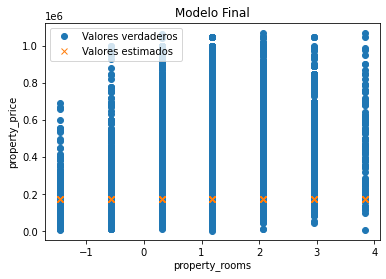

In [174]:
plot_regression(modelo, x_train, y_train, title=f"Modelo Final",xlabel="property_rooms", ylabel="property_price")